# USING THE IRIS DATASET FOR MACHINE LEARNING AND VISUALIZATIONS

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
#viewing sampled data from the dataset
iris_df = pd.read_csv("../Data Files/Iris.csv")
iris_df.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
55,5.7,2.8,4.5,1.3,versicolor
40,5.0,3.5,1.3,0.3,setosa
81,5.5,2.4,3.7,1.0,versicolor
115,6.4,3.2,5.3,2.3,virginica
110,6.5,3.2,5.1,2.0,virginica


In [3]:
#dataset columns
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
#No nulls 
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#value counts on species
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
iris_df.species.nunique()

3

There are 3 unique flower species in the dataset :setosa,versicolor and virginica each with 50 entries amounting to 150 total rows.

In [7]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


No significant outliers were detected, as the minimum and maximum values in each column are reasonably close to the mean.

# VISUALIZATIONS

In [8]:
# Group by species and calculate mean
data = iris_df.groupby('species').mean().reset_index()

In [9]:
data

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.418,1.464,0.244
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


Using a plot of your choice, illustrate each flower's sepal length, sepal width, and petal length.

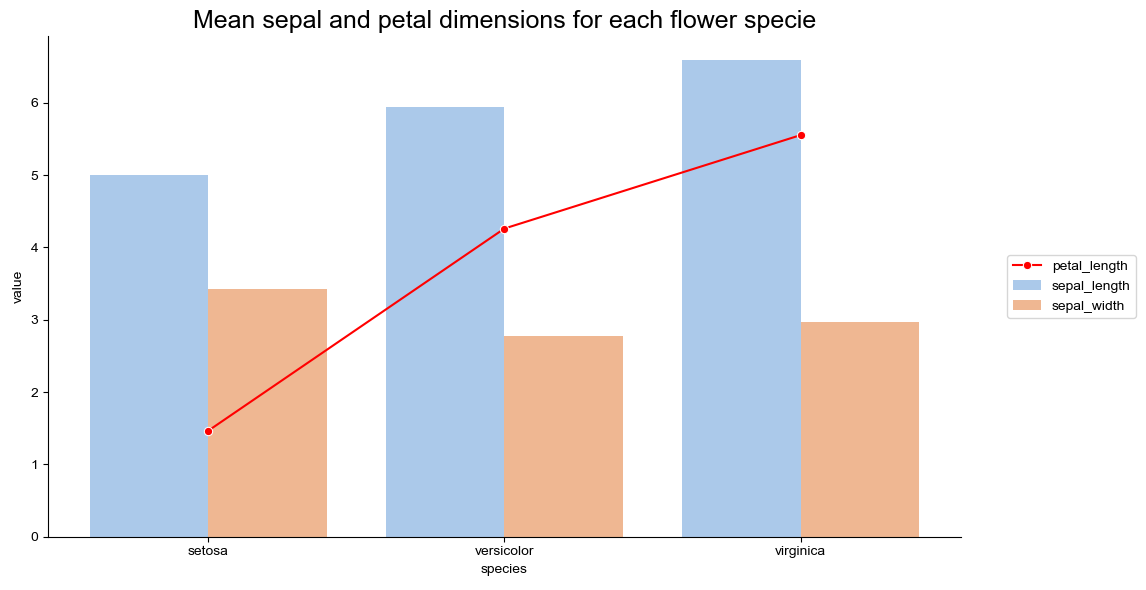

In [10]:
# Melt data for sepals
graph_sepals_df = pd.melt(data, id_vars=['species'], value_vars=['sepal_length', 'sepal_width'])

# Melt data for petals
graph_petals_df = pd.melt(data, id_vars=['species'], value_vars=['petal_length'])

# Create the bar plot for sepals
graph = sns.catplot(kind='bar', height=6, aspect=2.0, palette='pastel', data=graph_sepals_df, x='species', y='value', hue='variable',legend=False)

# Add the line plot for petal length
sns.lineplot(x='species', y='value', data=graph_petals_df, sort=False, ax=graph.ax, marker='o', color='red', label='petal_length')

graph.ax.spines['bottom'].set_position(('data',0))
graph.ax.set_title("Mean sepal and petal dimensions for each flower specie",fontname='Arial',fontsize=18)
graph.ax.legend(loc='right',bbox_to_anchor=(1.2, 0.5))

sns.set_style('darkgrid')

#show
plt.tight_layout()
plt.show()

Using a bar graph,for each specie, plot its mean petal length and width.

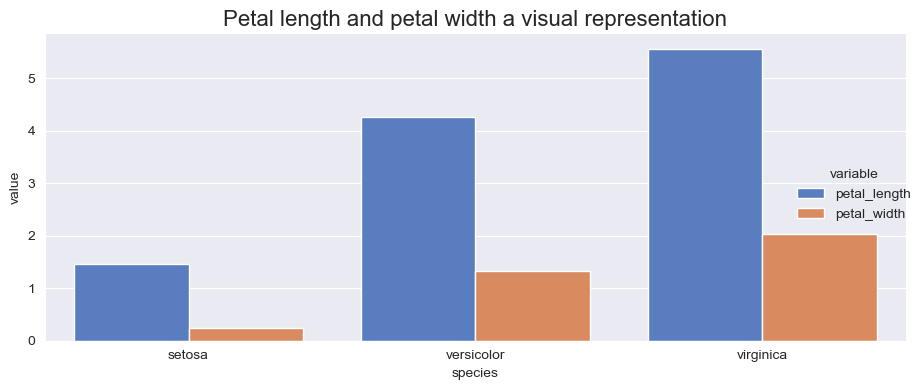

In [11]:
# Melt data for petals
graph_petal_length=pd.melt(data,id_vars=['species'],value_vars=['petal_length','petal_width'])

#plot
graph = sns.catplot(kind='bar',hue='variable',height=4,aspect=2.0,x='species',y='value',data=graph_petal_length,palette='muted')

graph.ax.spines['bottom'].set_position(("data",0))
graph.ax.set_title("Petal length and petal width a visual representation",fontname='Arial',fontsize=16)

sns.set_style('darkgrid')

#show
plt.tight_layout()
plt.show()

Using a crosstab, view distributions of flower species to sepal width

In [12]:
crosstab = pd.crosstab(iris_df.species,iris_df.sepal_width,margins=True)
crosstab

sepal_width,2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,...,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4,All
species,,,,,,,,,,,,,,,,,,,,,
setosa,0,0,1,0,0,0,0,0,1,6,...,6,2,3,4,2,1,1,1,1,50
versicolor,1,2,3,3,4,3,5,6,7,8,...,0,0,0,0,0,0,0,0,0,50
virginica,0,1,0,0,4,2,4,8,2,12,...,0,1,0,2,0,0,0,0,0,50
All,1,3,4,3,8,5,9,14,10,26,...,6,3,3,6,2,1,1,1,1,150


The result above shows that Virginica has the highest frequency at a sepal width of 3.0, with a count of 12.

Prove that the maximum count of Virginica occurs at a sepal width of 3.0 with a count of 12.

In [13]:
#Filter only virginica species
condition = iris_df['species']=='virginica'
small_frame = iris_df[condition]
#Group and count
small_frame = small_frame.groupby('sepal_width').species.count().reset_index()
#Sort in descending and find the top result
small_frame.sort_values(by='species',ascending=False).head(1)




,sepal_width,species
6,3.0,12


Visualize means of all parameters across all flower species using a pivot table

In [14]:
pivot_table = data.pivot_table(index='species',values=['sepal_length','sepal_width','petal_length','petal_width'],aggfunc='mean',margins=True)
pivot_table

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.464000,0.244000,5.006000,3.418
versicolor,4.260000,1.326000,5.936000,2.770
virginica,5.552000,2.026000,6.588000,2.974
All,3.758667,1.198667,5.843333,3.054


Largest petal length,petal width and sepal length is of Virginica while,the largest sepal width is of setosa.
Smallest petal length,petal width and sepal length is of Virginica while,the smallest sepal width is of versicolor

Draw a scatter plot showing the petal length,petal width,sepal length and sepal width of the 3 species Versicolor,Setosa and Virginica
Use them as hue to distinguish between them

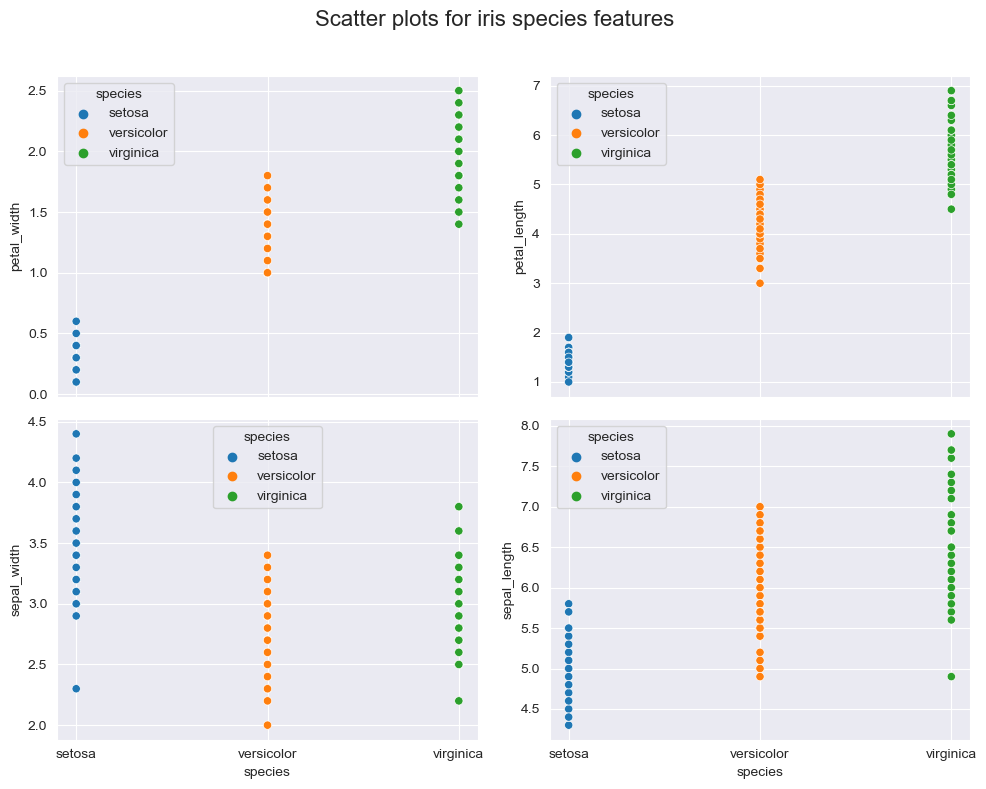

In [15]:
#Figure setup
fig,axes = plt.subplots(2,2,figsize=(10,8),sharex=True)

#petal_width
columns_for_petal_width = ['species','petal_width']
petal_width_df = iris_df[columns_for_petal_width]
sns.scatterplot(x='species',y='petal_width',data=petal_width_df,hue='species',ax=axes[0,0])

#petal_length
columns_for_petal_length = ['species','petal_length']
petal_length_df = iris_df[columns_for_petal_length]
sns.scatterplot(x='species',y='petal_length',data=petal_length_df,hue='species',ax=axes[0,1])

#sepal_width
columns_for_sepal_width = ['species','sepal_width']
sepal_width_df = iris_df[columns_for_sepal_width]
sns.scatterplot(x='species',y='sepal_width',data=sepal_width_df,hue='species',ax=axes[1,0])

#sepal_length
columns_for_sepal_length = ['species','sepal_length']
sepal_length_df = iris_df[columns_for_sepal_length]
sns.scatterplot(x='species',y='sepal_length',data=sepal_length_df,hue='species',ax=axes[1,1])

#Title
fig.suptitle('Scatter plots for iris species features',fontsize=16)

#Show
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


Virginica has higher distributions of its values across all features except for sepal width where setosa tops.
Versicolor has a medium distribution except for the sepal width where most of its values seem low as compared to other species.

# MACHINE LEARNING

Based on learning features:sepal_length,sepal_width,petal_length and petal_width, create a model that can predict the flower specie

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

In [17]:
X = iris_df.drop('species',axis=1)
y=iris_df['species'].apply(lambda x:1 if x=='setosa' else(2 if x=='versicolor' else 3))

y.value_counts()

1    50
2    50
3    50
Name: species, dtype: int64

In [18]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [20]:
#Training using a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

tree =  DecisionTreeClassifier()
tree.fit(X_train,y_train)

train_predictions = tree.predict(X_train)
y_pred_tree = tree.predict(X_test)

print("--------------------------------------------------------------------")
print("Accuracy on test data:",accuracy_score(y_test,y_pred_tree))
print("Accuracy on train data:",accuracy_score(y_train,train_predictions))
print("Classification metrics\n:")
print(classification_report(y_test,y_pred_tree))
print("--------------------------------------------------------------------")

--------------------------------------------------------------------
Accuracy on test data: 0.9333333333333333
Accuracy on train data: 1.0
Classification metrics
:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      0.88      0.91        17
           3       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

--------------------------------------------------------------------


A very perfect test score was obtained on the test data so an accuracy score test was performed on the training data and it turned out to 1 equivalent to 100%

It is fair to say that the model has overfitted. It has learnt too perfectly from the data.
This would make a lot of sense considering the size of the dataframe(150 entries) and the distribution across the three species being 50 for each.

To handle this, we would need an increased size of the dataset or to explore other training models.

The above also applies to the random forest classifier model below.

In [23]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_test,y_test)

y_pred_random = random.predict(X_test)

print("--------------------------------------------------------------------")
print("Accuracy:",accuracy_score(y_test,y_pred_random))
print("Classification metrics:\n")
print(classification_report(y_test,y_pred_random))
print("--------------------------------------------------------------------")

--------------------------------------------------------------------
Accuracy: 1.0
Classification metrics:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------------------------------------------------------


For the unsupervised trainig method we explored using clustering.
From the result below, the data can cluster the classes of results at 50% which is fair but can be improved.

The Silhouette score is a metric used to measure the quality of clustering results, and a higher score indicates a better clustering result.

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=3,)
kmeans.fit(X_train)

cluster_labels =kmeans.predict(X_test)

print("\n-------------------------------------------------")
print(silhouette_score(X_test,cluster_labels))
print("\n-------------------------------------------------")



C:\Users\HomePC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HomePC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



-------------------------------------------------
0.5029987443648434

-------------------------------------------------


FUTURE IMPROVEMENTS

Find an improved dataset.

Add cells showing the expected result and the predicted value.

# REFERENCES


https://medium.com/@hazallgultekin/what-is-silhouette-score-f428fb39bf9a